### Advertising.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Advertising.csv')
# Afficher les premières lignes du dataset
display(df.head())


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

In [7]:
# afficher tout les mesures du dataset
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


- count : Il y a 200 valeurs pour chaque variable, donc aucune donnée manquante.
- mean (moyenne) :
    TV : En moyenne, le budget TV est de 147,04.
    radio : En moyenne, le budget radio est de 23,26.
    newspaper : En moyenne, le budget journal est de 30,55.
    sales : Les ventes moyennes sont de 14,02.
- std (écart-type) :
    Indique la dispersion des budgets et des ventes autour de la moyenne. Par exemple, le budget TV varie fortement (écart-type de 85,85).
- min et max :
    Les budgets et les ventes varient entre les valeurs minimales et maximales indiquées (ex : ventes de 1,6 à 27).
- 25%, 50%, 75% (quartiles) :
    25% des valeurs sont inférieures au 1er quartile, 50% inférieures à la médiane, 75% inférieures au 3ème quartile.  
Par exemple, 25% des ventes sont inférieures à 10,375 ; la moitié sont inférieures à 12,9 ; 75% sont inférieures à 17,4.

- Le budget TV varie fortement (écart-type de 85,85) car les entreprises n’investissent pas toutes le même montant dans la publicité télévisée.  
- Certaines campagnes utilisent un très petit budget, tandis que d’autres investissent massivement.
- Cette grande différence entre les montants investis explique la forte dispersion des valeurs autour de la moyenne.
- L’écart-type élevé montre donc qu’il existe une grande diversité dans les stratégies publicitaires à la télévision parmi les 200 exemples du dataset.

L’écart-type mesure la dispersion des valeurs autour de la moyenne d’une variable.  
- **Écart-type faible** : Les valeurs sont proches de la moyenne, donc la variable est peu dispersée.
- **Écart-type élevé** : Les valeurs sont très variées et éloignées de la moyenne, donc la variable est très dispersée.

Par exemple, si le budget TV a un écart-type élevé, cela signifie que certains exemples ont investi très peu, d’autres beaucoup, et il existe une grande diversité dans les montants investis.  
L’écart-type permet donc de savoir si les données sont homogènes ou hétérogènes.

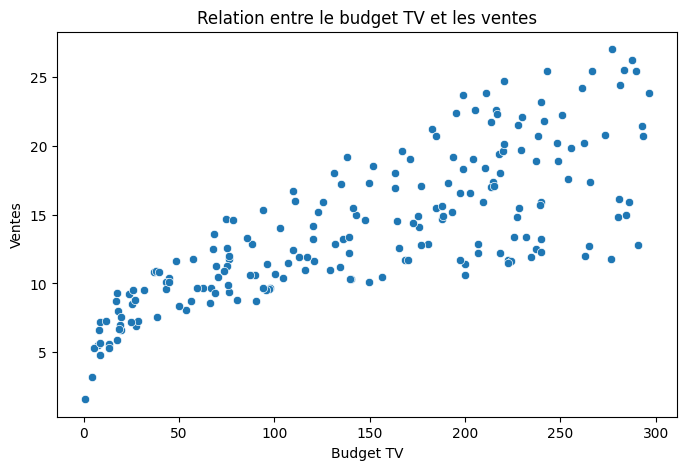

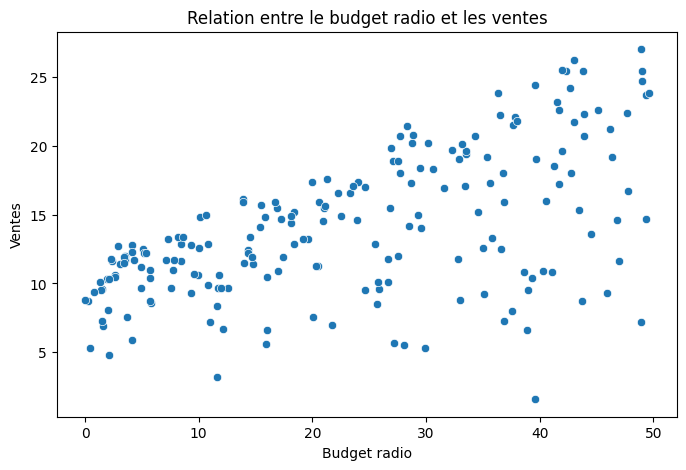

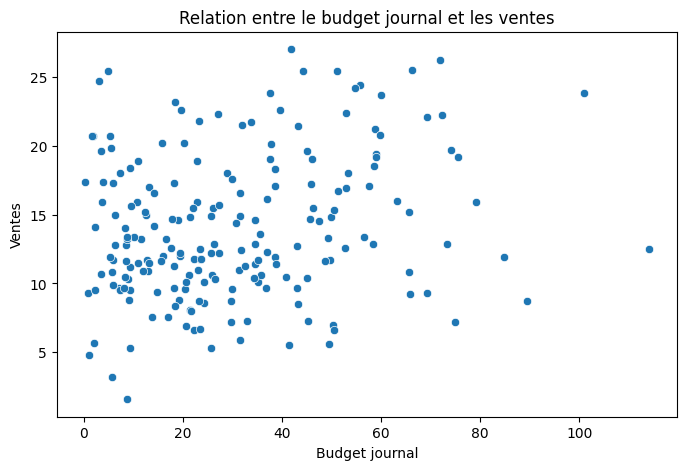

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# TV vs sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['TV'], y=df['sales'])
plt.title('Relation entre le budget TV et les ventes')
plt.xlabel('Budget TV')
plt.ylabel('Ventes')
plt.show()

# radio vs sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['radio'], y=df['sales'])
plt.title('Relation entre le budget radio et les ventes')
plt.xlabel('Budget radio')
plt.ylabel('Ventes')
plt.show()

# newspaper vs sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['newspaper'], y=df['sales'])
plt.title('Relation entre le budget journal et les ventes')
plt.xlabel('Budget journal')
plt.ylabel('Ventes')
plt.show()

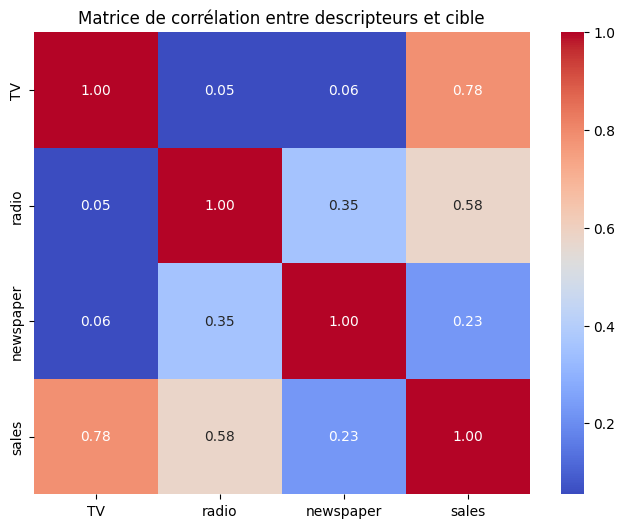

In [9]:

corr_matrix = df[['TV', 'radio', 'newspaper', 'sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre descripteurs et cible')
plt.show()

L’interprétation de la matrice de corrélation affichée par le heatmap :

- **La corrélation** mesure la force et le sens de la relation linéaire entre deux variables (entre -1 et +1).
- **Valeur proche de +1** : forte corrélation positive (quand une variable augmente, l’autre aussi).
- **Valeur proche de -1** : forte corrélation négative (quand une variable augmente, l’autre diminue).
- **Valeur proche de 0** : pas de corrélation linéaire.

Dans ton cas :
- **TV et sales** : forte corrélation positive (plus le budget TV est élevé, plus les ventes augmentent).
- **radio et sales** : corrélation positive, mais moins forte que TV.
- **newspaper et sales** : corrélation faible ou nulle (le budget journal n’a pas beaucoup d’impact sur les ventes).

**Conclusion :**  
Le budget TV est le descripteur le plus lié aux ventes, suivi par la radio. Le journal a peu d’influence sur la variable cible dans ce dataset.

In [10]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
model = LinearRegression()

# Définir les variables explicatives (X) et la variable cible (y)
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

Dans ton code, tu utilises tout le dataset pour entraîner le modèle (`model.fit(X, y)`) sans le diviser en données d’entraînement et de test.  
Cela signifie que tu évalues le modèle sur les mêmes données que celles utilisées pour l’apprentissage.

**Pourquoi ce n’est pas recommandé ?**  
- Tu ne peux pas mesurer la capacité du modèle à généraliser sur de nouvelles données.
- Tu risques d’obtenir des résultats trop optimistes (sur-apprentissage).

**Bonne pratique :**  
Il faut diviser le dataset en deux parties :  
- **Entraînement** (pour ajuster le modèle)
- **Test** (pour évaluer la performance sur des données jamais vues)

Ainsi, tu obtiens une évaluation plus réaliste du modèle.


In [3]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print("Ensembles d'entraînement et de test créés avec succès.\n",
      "X_train",X_train.shape, 
      "\nX_test", X_test.shape, 
      "\ny_train", y_train.shape, 
      "\ny_test", y_test.shape)

NameError: name 'X' is not defined

In [16]:
#estimation des coefficients du modele lineaire
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients du modèle :")
for i, col in enumerate(X.columns):
    print(f"{col} : {coefficients[i]}")
print(f"Intercept : {intercept}")

Coefficients du modèle :
TV : 0.04681995525137476
radio : 0.18857655931851033
newspaper : 0.0014503705461097517
Intercept : 2.6575859171460774


Voici comment interpréter les résultats affichés par ton code :

- **Coefficients du modèle** :  
  Chaque coefficient indique l’impact d’un descripteur sur la variable cible (`sales`).  
  Par exemple, si le coefficient pour `TV` est 0.045, cela signifie qu’une augmentation de 1 unité du budget TV entraîne une augmentation moyenne de 0.045 unité des ventes, toutes choses égales par ailleurs.

- **Intercept** :  
  C’est la valeur de `sales` quand tous les descripteurs sont à zéro.  
  Il représente la base des ventes sans investissement publicitaire.

**En résumé :**  
Les coefficients te permettent de savoir quels budgets publicitaires ont le plus d’influence sur les ventes.  
Un coefficient élevé indique une forte influence, un coefficient proche de zéro indique une faible influence.  
L’intercept donne la valeur de départ des ventes.  
Tu peux ainsi écrire l’équation du modèle et comprendre l’importance de chaque descripteur.

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
variance = y_test.var()
ecart_type = y_test.std()


print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE) : {rmse:.2f}")
print(f"Score R² : {r2:.2f}")
print(f"Variance des ventes réelles : {variance:.2f}")
print(f"Écart-type des ventes réelles : {ecart_type:.2f}")
if rmse < ecart_type and r2 > 0.8:
    print("Le RMSE est inférieur à l'écart-type : le modèle est performant.")
else:
    print("Le RMSE est supérieur à l'écart-type : le modèle n'est pas pertinent.")

Erreur quadratique moyenne (MSE) : 2.77
Racine de l'erreur quadratique moyenne (RMSE) : 1.66
Score R² : 0.91
Variance des ventes réelles : 30.40
Écart-type des ventes réelles : 5.51
Le RMSE est inférieur à l'écart-type : le modèle est performant.


# Modele avec seulement TV et radio

In [22]:
# Modèle avec seulement TV et radio
# Définir les variables explicatives (X) et la variable cible (y)
X = df[['TV', 'radio']]
y = df['sales']

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
variance = y_test.var()
ecart_type = y_test.std()


print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE) : {rmse:.2f}")
print(f"Score R² : {r2:.2f}")
print(f"Variance des ventes réelles : {variance:.2f}")
print(f"Écart-type des ventes réelles : {ecart_type:.2f}")
if rmse < ecart_type and r2 > 0.8:
    print("Le RMSE est inférieur à l'écart-type : le modèle est performant.")
else:
    print("Le RMSE est supérieur à l'écart-type : le modèle n'est pas pertinent.")

Erreur quadratique moyenne (MSE) : 2.77
Racine de l'erreur quadratique moyenne (RMSE) : 1.66
Score R² : 0.91
Variance des ventes réelles : 30.40
Écart-type des ventes réelles : 5.51
Le RMSE est inférieur à l'écart-type : le modèle est performant.


la variable **newspaper** et les résultats (RMSE et R²) ne changent pas ou restent aussi bons, cela signifie que **newspaper n’apporte aucune information utile** pour prédire les ventes.

**Conclusion :**  
Le modèle est aussi performant sans `newspaper`, donc cette variable peut être retirée pour simplifier le modèle sans perte de qualité.  
C’est une bonne pratique en machine learning : garder seulement les variables pertinentes.